In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values here.

# Data Cleaning

### PatientID

This data type is in float, converting to int because PatientId is a numeric identifier without letters or special formatting, and storing it as an integer ensures accuracy, saves memory, and improves performance.

In [9]:
df['PatientId'] = df['PatientId'].astype('int64')

In [10]:
len(df['PatientId'].unique())

62299

There are 62,299 patients which indicates that some patients had more than one appointment

### AppointmentID

The data type is in int, so we are keep that way

In [11]:
len(df['AppointmentID'].unique())

110527

This attribute seems to be consistent: there are 110,527 instances in the dataset, as well as 110,527 unique values for the appointmentIDs. For last, since each instance corresponds to an appointment register, we will redefine the dataset index to the appointment IDs.

In [12]:
df.set_index('AppointmentID', drop=True, inplace=True)

### Age

It is not possible for a person to be aged -1, and ages over 100 years also raise concerns. While the latter will be explored further during the exploratory data analysis (EDA), negative ages are definitely invalid and must be corrected. As a first step, we will check how many such instances exist before deciding how to handle them.

In [13]:
df[df['Age']<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5775010,465943158731293,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since there is just one occurrence, it will be removed from the dataset.

In [14]:
df.drop(5775010, inplace=True)

### Handcap

In [15]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

This attribute assumes values from 0 to 4, probably indicating the handicap number for each patient. In this analysis, we will map to 1 any value higher than 0.

Also, there is a typo in the attribute name (it should be handicap) which will be corrected later.

### Gender

In [16]:
df.Gender.value_counts()

Gender
F    71839
M    38687
Name: count, dtype: int64

Only two values are expected from this attribute. In order to check its consistency, the sum for both Male and Female classes must equal the total number of instances.

Although the attribute data are consistent (the total sums 110,526 instances), they are unbalanced. Since each instance represents the appointment and not the patient, this fact can be treated in a further analysis.

### Schedule and Appointment Day

We will parse the data in order to find out how many days have passed between the schedule date and the appointment date.

In [17]:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
## Creating a new column (attribute) containing just the scheduling time:
df['ScheduleTime'] = df.ScheduledDay.dt.time
## Normalizing the "Day" columns to keep just the date information (dropping the time info)
df['ScheduledDay'] = df.ScheduledDay.dt.normalize()

Create a  new column Waiting Days which is the difference between Schedule and appointment day

In [18]:
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']

At this point we must check the data consistency in relation to the scheduling and appointment times: if the new WaitingDays attribute has negative values, this indicates that the scheduling was performed after the appointment and such record should therefore be handled.

To help further analysis, a function will be created to return a time delta type from a given number of days.



In [19]:
def waiting_days(days):
    '''
    Auxiliary function to return a Timedelta from an integer day value.
    Syntax: waiting_days(days), where:
        days = int type with the number of days considered.
    Return: pandas.Timedelta object.
    '''
    return pd.Timedelta(f'{days} days')

In [20]:
df[df['WaitingDays'] < waiting_days(0)]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,WaitingDays
AppointmentID,,,,,,,,,,,,,,,
5679978,7839272661752,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,10:51:53,-1 days
5715660,7896293967868,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,14:50:41,-1 days
5664962,24252258389979,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,13:43:58,-1 days
5686628,998231581612122,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,13:49:20,-6 days
5655637,3787481966821,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,06:50:57,-1 days


Since few inconsistent instances have been found, they will be removed:

In [21]:
dropIx = df[df['WaitingDays'] < waiting_days(0)].index
df.drop(dropIx, inplace=True)

When we subtract ScheduledDay from AppointmentDay, the result is a Pandas Timedelta object. This stores the full time difference, including hours and minutes (e.g., 3 days 00:00:00).

However, for analysis purposes, we only care about the number of whole days a patient waited. To simplify the data, we extract just the day component using Pandas' native accessor

In [22]:
df['WaitingDays'] = df.WaitingDays.dt.days

We want to understand how the number of waiting days influences whether a patient shows up for their appointment.
* We will group the data by WaitingDays and No-show to see how waiting time affects attendance.
* Using count() on PatientId, we wil calculate how many patients showed up or missed appointments for each waiting day.
* Then, will use unstack() to reshape the data for easier comparison between show and no-show counts.

In [23]:
waitingdays = df.groupby(by=['WaitingDays','No-show'])

In [24]:
waitingdays = waitingdays.count()['PatientId'].unstack()

In [25]:
waitingdays

No-show,No,Yes
WaitingDays,,
0,36770.0,1792.0
1,4100.0,1113.0
2,5123.0,1602.0
3,2093.0,644.0
4,4059.0,1231.0
...,...,...
155,4.0,6.0
162,9.0,2.0
169,7.0,1.0


For some values of WaitingDays, there may be no corresponding records for either No-show: Yes or No-show: No.
As a result, the grouped data contains NaN values.
    
Lets check

In [26]:
waitingdays.isna().sum()

No-show
No      5
Yes    18
dtype: int64

We will replace those NaN for 0. We will also reset the index, moving its values to a new dataframe column:

In [27]:
waitingdays.fillna(value=0, inplace=True)
waitingdays.reset_index(drop=False, inplace=True)
waitingdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WaitingDays  129 non-null    int64  
 1   No           129 non-null    float64
 2   Yes          129 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.2 KB


We are applying custom binning to convert the continuous WaitingDays variable into categorical intervals using pandas.cut(). This transformation helps organize the data into meaningful groups, making it easier to perform further analysis 

In [28]:
categories = pd.Series(['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180', 'Very long: >180'])

In [29]:
## Applying these categories both to the auxiliary and to the working datasets:
waitingdays['WaitingDays'] = pd.cut(waitingdays.WaitingDays, bins = [-1,0,3,7,15,30,90,180, 10000], labels=categories)
df['WaitingCategories'] = pd.cut(df.WaitingDays, bins = [-1,0,3,7,15,30,90,180, 10000], labels=categories)

In [30]:
waitingdays = waitingdays.groupby('WaitingDays').sum()
waitingdays['No-showing rate'] = (waitingdays.Yes / waitingdays.No)*100

C:\Users\freev\AppData\Local\Temp\ipykernel_25716\3185754668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  waitingdays = waitingdays.groupby('WaitingDays').sum()


In [31]:
waitingdays

No-show,No,Yes,No-showing rate
WaitingDays,,,
Same day: 0,36770.0,1792.0,4.873538
Short: 1-3,11316.0,3359.0,29.683634
Week: 4-7,13097.0,4413.0,33.694739
Fortnight: 8-15,9362.0,4166.0,44.499039
Month: 16-30,10709.0,5159.0,48.174433
Quarter: 31-90,6792.0,3369.0,49.602473
Semester: 91-180,161.0,56.0,34.782609
Very long: >180,0.0,0.0,NaN


In [32]:
df['WaitingDays'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64

### Neighborhood

In [33]:
neighborhood = df.Neighbourhood.unique()
neighborhood.sort()  
neighborhood

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

Considering "ILHAS OCEÂNICAS DE TRINDADE" is not an official neighborhood of Vitória [8], the two instances related to them will be dropped off.

In [34]:
df.drop(df[df['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'].index, inplace=True)

In [35]:
neighborhood = df.Neighbourhood.unique()
neighborhood.sort()

### No-show 

In [36]:
df['No-show'].value_counts()

No-show
No     88207
Yes    22312
Name: count, dtype: int64

### Reordering the Columns

The total sum is consistent with the dataset length. However, as it was also noticed for the Gender attribute, this data are unbalanced, i.e. there are more instances pertaining to one class than other. Since this attribute represents our dataset categorization, this fact becomes more relevant for the further analysis. In other words, although we can get some useful insights from this data, we must be careful when applying this dataset to training machine learning algorithms and so on.

In [37]:
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'ScheduleTime',
       'WaitingDays', 'WaitingCategories'],
      dtype='object')

### Correcting the typos in Column Names

In [38]:
df.rename(columns={
    'No-show': 'No_show',
    'Handcap': 'Handicap',
    'ScheduleTime': 'ScheduledTime'
}, inplace=True)

# EDA

In [39]:
def get_statistics(data, bins=20):
    '''Prints basic statistics from the input data. 
    Syntax: get_statistics(data, bins=20), where:
        data = the input data series;
        bins = the number of bins to the histogram.
    '''
    total = data.values
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))
    print('Median:', np.median(total))
    plt.hist(data, bins=bins);
    
def get_total(dataframe):
    '''Return the total sum of each numerical attribute of a pandas.Dataframe.'''
    return dataframe.sum(axis=1)
    
def df_row_normalize(dataframe):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each line.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    return dataframe.div(dataframe.sum(axis=1), axis=0)

def df_column_normalize(dataframe, percent=False):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each column.
    If percent=True, multiplies the final value by 100.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    if percent:
        return dataframe.div(dataframe.sum(axis=0), axis=1)*100
    else:
        return dataframe.div(dataframe.sum(axis=0), axis=1)

### Waiting time between the scheduling and the appointment date

Mean: 10.18400456030185
Standard deviation: 15.255012525530072
Minimum: 0
Maximum: 179
Median: 4.0


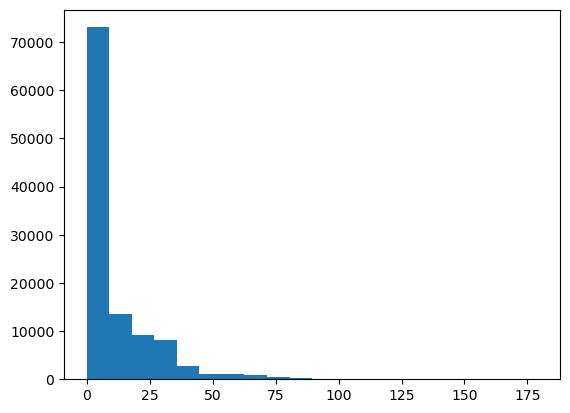

In [40]:
get_statistics(df.WaitingDays)

The average waiting is about 10 days, with a standard deviation of approximately 15 days. 

In [41]:
eda_waitingDays = waitingdays.copy()  #Copying the dataframe from Section 2.3.3
eda_waitingDays.reset_index(drop=False, inplace=True)  #Making the index as a column in order to be plotted.
eda_waitingDays.drop(7, inplace=True)  #Droppping the last row, since it's empty.

## Adding new columns:
#Transforming the 'No-showing rate' into strings with the percentual values:
eda_waitingDays['No-show percentual'] = eda_waitingDays['No-showing rate'].apply(lambda x: '{0:.2f}%'.format(x))
#Multiplying the rate values by 500 times in order to be plotted in the same scale:
eda_waitingDays['No-showing rate (500x)'] = eda_waitingDays['No-showing rate']*500

## Showing the adjusting dataframe:
eda_waitingDays

No-show,WaitingDays,No,Yes,No-showing rate,No-show percentual,No-showing rate (500x)
0,Same day: 0,36770.0,1792.0,4.873538,4.87%,2436.769105
1,Short: 1-3,11316.0,3359.0,29.683634,29.68%,14841.816896
2,Week: 4-7,13097.0,4413.0,33.694739,33.69%,16847.369627
3,Fortnight: 8-15,9362.0,4166.0,44.499039,44.50%,22249.519333
4,Month: 16-30,10709.0,5159.0,48.174433,48.17%,24087.216360
5,Quarter: 31-90,6792.0,3369.0,49.602473,49.60%,24801.236749
6,Semester: 91-180,161.0,56.0,34.782609,34.78%,17391.304348


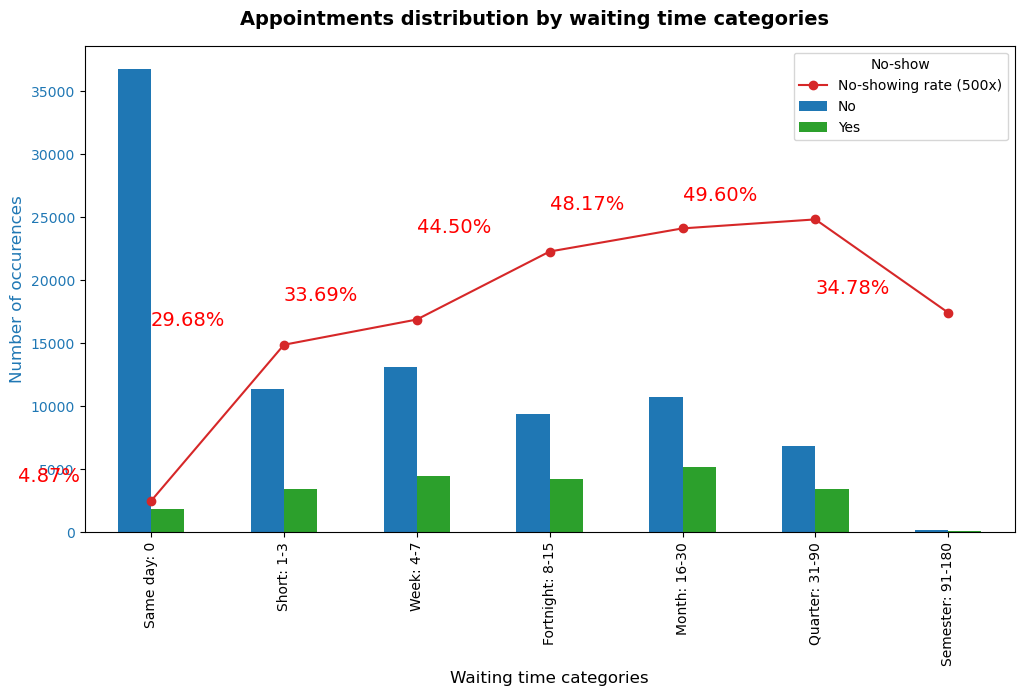

In [42]:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
plt.suptitle('Appointments distribution by waiting time categories', fontsize=14, fontweight='bold')

colors = ['tab:blue', 'tab:green', 'tab:red']  #Defines the colors to be used

ax.set_ylabel('Number of occurences', color=colors[0], fontsize=12)  #Set the y-axis color and label
ax.tick_params(axis='y', labelcolor=colors[0])

## Plotting the line chart:
eda_waitingDays[['WaitingDays', 'No-showing rate (500x)']].plot(x='WaitingDays', linestyle='-', marker='o', ax=ax, color=colors[2])
#Setting the line chart marker labels
x = ax.get_xticks()  #Getting the x-axis ticks to plot the label
for a,b,c in zip(x,eda_waitingDays['No-showing rate (500x)'], eda_waitingDays['No-show percentual']):
    plt.text(a,b+1500,c, color='red', fontsize=14)
    
## Plotting the bar chart:
eda_waitingDays[['WaitingDays', 'No', 'Yes']].plot(x='WaitingDays', kind='bar', ax=ax, color=colors[0:2])

ax.set_xlabel('Waiting time categories', fontsize=12)  #Set the y-axis color and label

plt.show()

Through the chart above, it becomes evident that the no-showing rate increases as the waiting gets longer. It reaches the lower rates when the attendance occurs in the same day it was scheduled. We can then associate it with the emergency care or even when the patient goes to the health unit without previous scheduling.

It is curious to notice that after one quarter waiting there is a slight return to the patient assiduity, when the no-showing rate downs from 49.6% to %34.78. This question will be explored deeply in the next section.

### Is there any relation between the waiting time and the no-showing appointments?

As noted in the chart above, the no-showing rate increases along the waiting time, however it starts to decrease after one quarter waiting, we will now compare some basic statistics of the numerical attributes from the group patients attending to the appointments in the same day (Group I) and after one quarter (Group II).

In [44]:
group_I = df[df['WaitingCategories'] == 'Same day: 0'].describe()
group_I

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingDays
count,3.856200e+04,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.0,38562.0
mean,1.516521e+14,34.452311,0.108656,0.175536,0.066542,0.039884,0.026347,0.0,0.0
std,2.606743e+14,23.221671,0.311211,0.380429,0.249231,0.195689,0.174429,0.0,0.0
min,4.374100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,4.344476e+12,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,3.325621e+13,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,9.536805e+13,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.0,0.0


In [45]:
group_II = df[df['WaitingDays']>90].describe()
group_II

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingDays
count,2.170000e+02,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1.240186e+14,60.788018,0.064516,0.539171,0.133641,0.013825,0.069124,0.640553,121.410138
std,2.309779e+14,25.672460,0.246238,0.499616,0.341052,0.117034,0.254252,0.480948,31.423518
min,5.649478e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000
25%,5.649261e+12,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000
50%,2.931216e+13,69.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,109.000000
75%,8.839695e+13,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,155.000000
max,9.965348e+14,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [46]:
def find_differences(serie1, serie2, pct_diff):
    '''Given two data series [serie1, serie2], compare those attributes and return 
    those who difference among them is higher than pct_diff (e.g. 50% must be entered as 0.5).
    The index of both series must be identical.
    '''
    try:
        if (serie1.index.all() == serie2.index.all()):
            ## Calculating the differences
            testA = serie1 / serie2
            testB = serie2 / serie1
            checkA = [x for x in testA if (x > pct_diff)&(x<1)]
            checkB = [x for x in testB if (x > pct_diff)&(x<1)]
            
            ## Showing which attributes in serie1 are less than "pct_diff" of those in serie1:
            print('Attributes in "Serie I" whose values are less than {0:.1f}% of those in "Serie II":'.format(pct_diff*100))
            for item in checkA:
                print('\t{0}: {1:.1f}%'.format(testA[testA == item].index[0], item*100))
            
            ## Showing which attributes of serie2 are "pct_diff" higher in serie1:
            print('Attributes in "Serie II" whose values are less than {0:.1f}% of those in "Serie I":'.format(pct_diff*100))
            for item in checkB:
                print('\t{0}: {1:.1f}%'.format(testB[testB == item].index[0], item*100))
    except ValueError:
        print('The series must have same index and length!')
    return    

In [47]:
find_differences(group_I.loc['mean'], group_II.loc['mean'], 0.30)

Attributes in "Serie I" whose values are less than 30.0% of those in "Serie II":
	Age: 56.7%
	Hipertension: 32.6%
	Diabetes: 49.8%
	Handicap: 38.1%
Attributes in "Serie II" whose values are less than 30.0% of those in "Serie I":
	PatientId: 81.8%
	Scholarship: 59.4%
	Alcoholism: 34.7%


Based on the findings above, the both group of patients can be characterized as follow, considering those attributes with a difference in the mean values higher than 30% of the other group:

Group I - Same day scheduling appointment:

* Average age: 34.5 years old (young adults)
* Scholarship: 10% receives scholarship
* Alcoholism: present in 3.9% of the group individuals
* Hipertension: present in 17.5% of the group individuals
* Diabetes: present in 6.6% of the group individuals
* Handicap: present in 2.4% of the group individuals

Group II - A semester waiting between schedulling and the appointment:
* Average age: 60.8 years old (senior)
* Scholarship: 6.4% receives scholarship
* Alcoholism: present in 1.4% of the group individuals
* Hipertension: present in 53.9% of the group individuals
* Diabetes: present in 13.4% of the group individuals
* Handicap: present in 6.9% of the group individuals

### How the no-showing appointments are distributed among the health units (neighborhood)?

How many appointments are registered to each health unit and if they were attended to or not. To find this out, we will carry two slightly distinct analysis based on the neighborhood attribute:

#### How the absence number is distributed along the neighborhoods?

In this analysis we will show the absence number distribution into two ways: first in absolute numbers, to get not only the information of which health unit presents more absence, but to know which one has the highest number of attendments. Second, it is interesting to compare the normalized data, i.e. how much the absence of each health unit represents the total of its attendments.

In [48]:
neighbors_I = df.groupby(by='Neighbourhood').No_show.value_counts().sort_index()

In [54]:
neighbors_I = neighbors_I.unstack()  #Converting the groupby object into a dataset
neighbors_I.fillna(value=0, inplace=True)  #Replacing NaN values by zero
print(neighbors_I.head(3))

No_show              No    Yes
Neighbourhood                 
AEROPORTO           7.0    1.0
ANDORINHAS       1741.0  521.0
ANTÔNIO HONÓRIO   221.0   50.0


In [55]:
normalNeighbor = df_row_normalize(neighbors_I)
print(normalNeighbor.head(3))

No_show                No       Yes
Neighbourhood                      
AEROPORTO        0.875000  0.125000
ANDORINHAS       0.769673  0.230327
ANTÔNIO HONÓRIO  0.815498  0.184502


In [56]:
normalNeighbor.describe()

No_show,No,Yes
count,80.000000,80.000000
mean,0.804525,0.195475
std,0.038502,0.038502
min,0.710815,0.000000
25%,0.783269,0.179868
50%,0.802693,0.197307
75%,0.820132,0.216731
max,1.000000,0.289185


In [57]:
## Adding a total column:
neighbors_I['Total'] = get_total(neighbors_I)
normalNeighbor['Total'] = get_total(normalNeighbor)

In [58]:
#Reseting the 'neighbourhood' index and making it as a column:
neighbors_I.reset_index(inplace=True)  
normalNeighbor.reset_index(inplace=True)

C:\Users\freev\AppData\Local\Temp\ipykernel_25716\422636150.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([''])


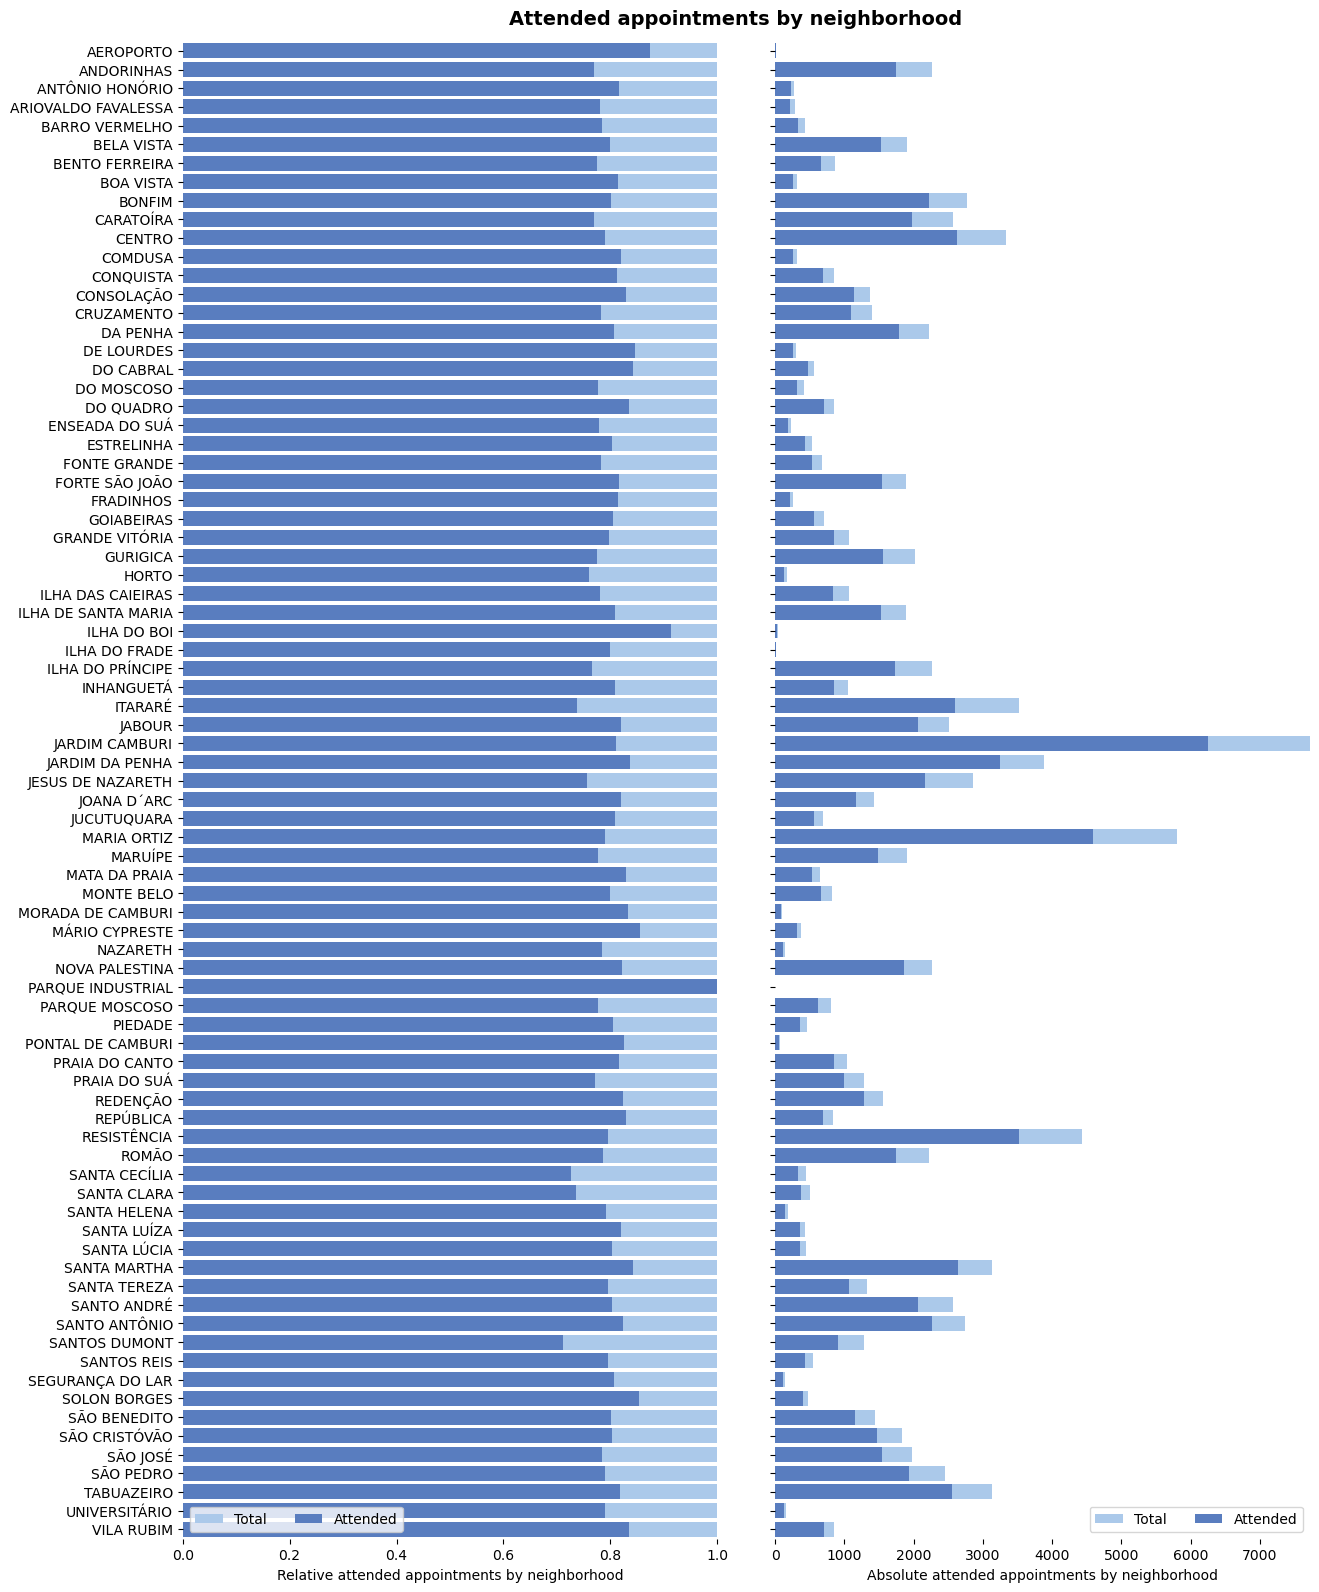

In [59]:
## Initialize the matplotlib figure:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,16), sharey=False)
fig2.tight_layout()  #When working with 'tight_layout', the subplot must be adjusted [https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot]
fig2.subplots_adjust(top=0.96)  #Adjusting the space for the superior title

## Plot the relative absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=normalNeighbor, label="Total", color="b", ax=ax1)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=normalNeighbor, label="Attended", color="b", ax=ax1)
## Add a legend and informative axis label
ax1.legend(ncol=2, loc="lower left", frameon=True)
ax1.set(xlim=(0, 1), ylabel="", xlabel="Relative attended appointments by neighborhood")
sns.despine(left=True, bottom=True,ax=ax1)

## Plot the absolute absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=neighbors_I, label="Total", color="b",ax=ax2)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=neighbors_I, label="Attended", color="b", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 7720), ylabel="", xlabel="Absolute attended appointments by neighborhood")  #The xlim value comes from the maximum value in the dataset.
ax2.set_yticklabels([''])
sns.despine(left=True, bottom=True, ax=ax2)

plt.suptitle('Attended appointments by neighborhood', fontsize=14, fontweight='bold')
plt.show()

From the analyzed data we found out that 80% of the appointments are attended to, with a standard deviation of 3.8%. The distribution of this numbers are easily perceived on the charts above

#### We have already seen that the no-showing rate increases as the waiting gets longer. Is the validity of this statement indifferent to geographical location?

The main purpose of this analysis is to check if the no-showing rate increases as the waiting gets longer along all the considered geographical locations. In order to get to this we will make use of a heatmap

In [60]:
neighbors_II = df.groupby(by=['Neighbourhood','No_show']).WaitingCategories.value_counts().sort_index()

In [61]:
neighbors_II = neighbors_II.unstack(1).unstack()  #Converting the groupby object into a dataset
neighbors_II.fillna(value=0, inplace=True)  #Replacing NaN values by zero
neighbors_II = df_row_normalize(neighbors_II)  #Normalizing its values by the total of each row
neighbors_II = neighbors_II['Yes']  #Keeping only the values related to the absence
## Converting the normalized float values to percentual int values:
neighbors_II = (neighbors_II*100).astype('int64')
neighbors_II = neighbors_II.reindex(columns=['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180'])

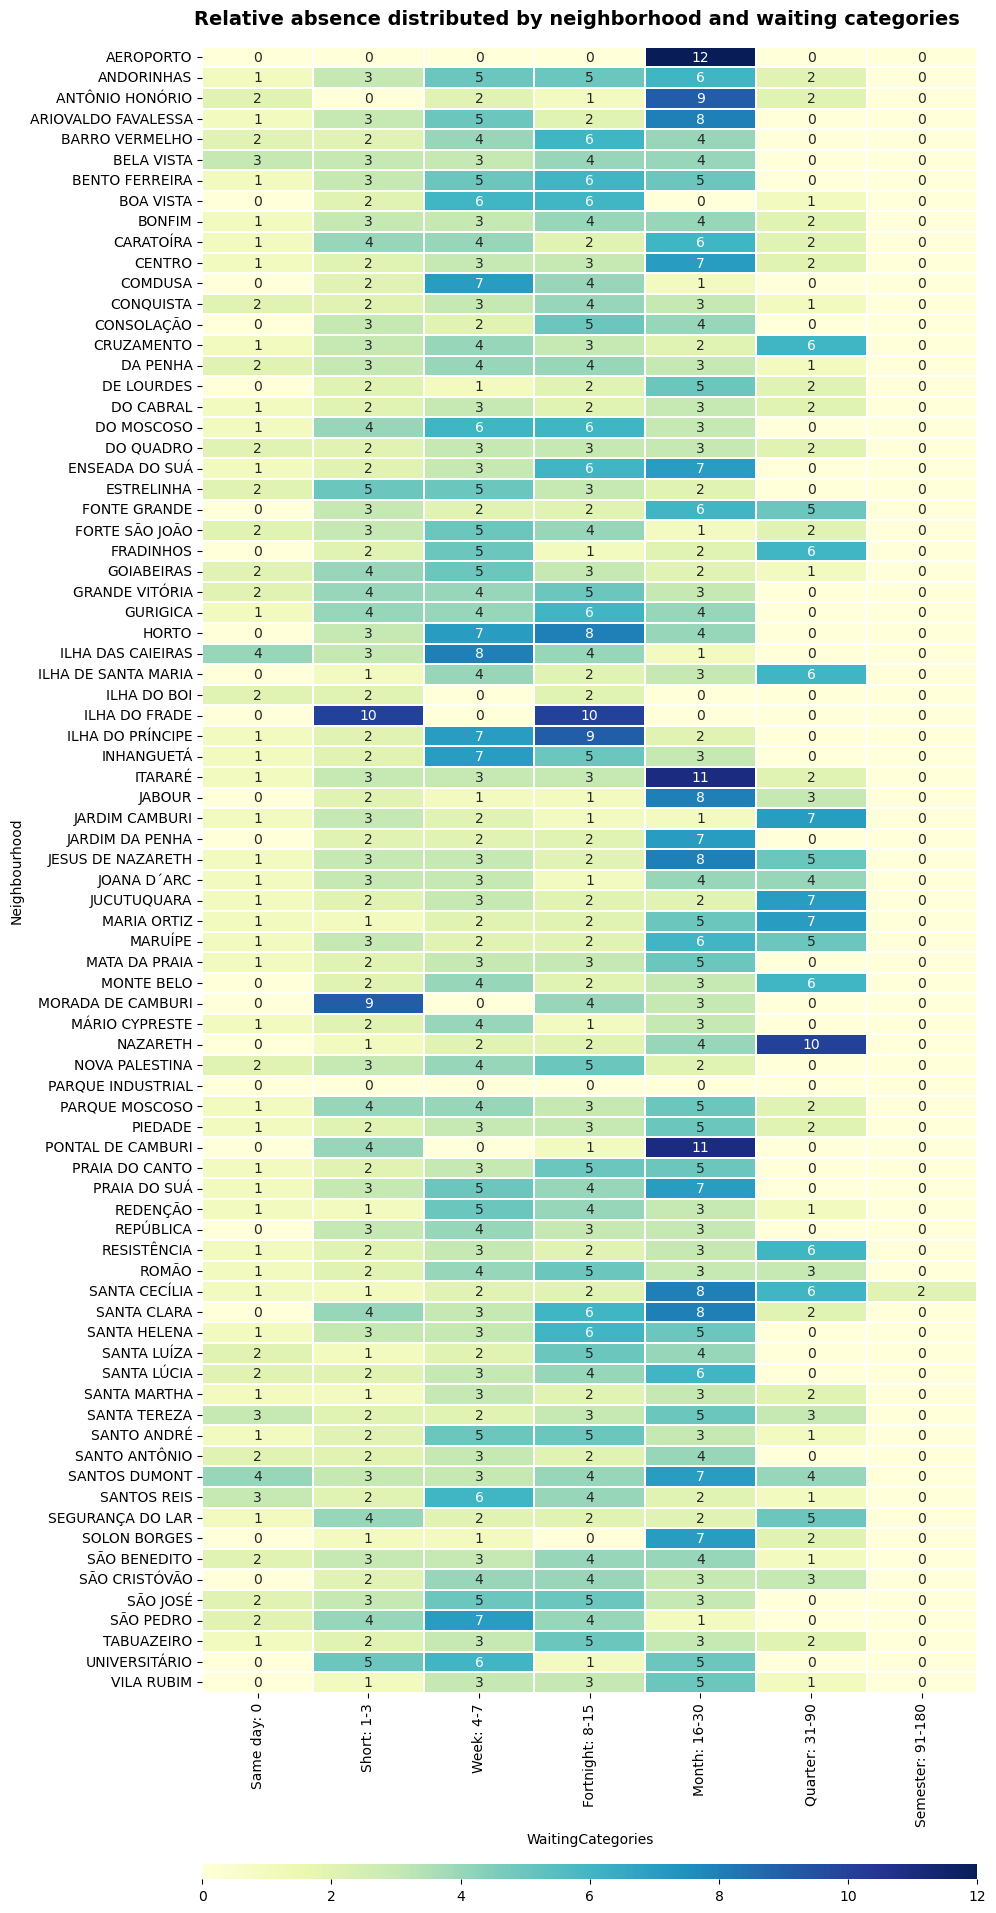

In [63]:
fig3, ax = plt.subplots(figsize=(10, 25))
fig3.subplots_adjust(top=.965)
plt.suptitle('Relative absence distributed by neighborhood and waiting categories', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(neighbors_II, annot=True, fmt='d', linewidths=.3, ax=ax, cmap='YlGnBu', cbar_kws=cbar_kws);

It can be drawn from the heatmap above that in general the no-showing rate increases as the waiting gets longer for most of neighborhood, besides slightly different for each local. Some neighborhoods have higher no-showing rates even for short waiting times (e.g. Ilha do Frade and Morada de Camburi).

From these insights, it would be reasonable for the public administration of these localities to investigate the reasons for such occurrences by collecting more detailed data and conducting deeper analysis.

### Patient Profiles

In [65]:
patients = df[['Gender','Age','Scholarship','Hipertension','Diabetes',
                    'Alcoholism','Handicap','WaitingCategories','SMS_received','No_show']]

In [66]:
patients.groupby(by=['No_show','WaitingCategories']).describe()

C:\Users\freev\AppData\Local\Temp\ipykernel_25716\4280159542.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patients.groupby(by=['No_show','WaitingCategories']).describe()


Age                                          \
                             count       mean        std  min    25%   50%   
No_show WaitingCategories                                                    
No      Same day: 0        36770.0  34.747648  23.275342  0.0  15.00  34.0   
        Short: 1-3         11316.0  43.441322  22.996905  0.0  25.00  47.0   
        Week: 4-7          13097.0  40.951057  22.738829  0.0  22.00  43.0   
        Fortnight: 8-15     9362.0  36.772805  22.674522  0.0  18.00  36.0   
        Month: 16-30       10709.0  37.680456  23.145006  0.0  18.00  38.0   
        Quarter: 31-90      6792.0  39.727326  23.501633  0.0  20.00  42.0   
        Semester: 91-180     161.0  63.248447  24.794160  0.0  52.00  71.0   
Yes     Same day: 0         1792.0  28.392299  21.207981  0.0  12.00  21.0   
        Short: 1-3          3359.0  39.450729  22.604173  0.0  20.00  40.0   
        Week: 4-7           4413.0  36.433265  21.641937  0.0  20.00  35.0   
        Fortnight: 8-15     4166.0  32.448392  21.414294  0.0  16.00  30.0   
        Month: 16-30        5157.0  33.036843  21.210556  0.0  16.00  31.0   
        Quarter: 31-90      3369.0  33.519442  22.396125  0.0  14.00  32.0   
        Semester: 91-180      56.0  53.714286  27.043207  0.0  41.75  59.5   

                                        Scholarship            ... Handicap  \
                             75%    max       count      mean  ...      75%   
No_show WaitingCategories                                      ...            
No      Same day: 0        53.00  115.0     36770.0  0.107289  ...      0.0   
        Short: 1-3         61.00  102.0     11316.0  0.076264  ...      0.0   
        Week: 4-7          59.00   97.0     13097.0  0.086585  ...      0.0   
        Fortnight: 8-15    54.00  115.0      9362.0  0.104251  ...      0.0   
        Month: 16-30       56.00  100.0     10709.0  0.090018  ...      0.0   
        Quarter: 31-90     58.00   98.0      6792.0  0.057715  ...      0.0   
        Semester: 91-180   82.00   94.0       161.0  0.055901  ...      0.0   
Yes     Same day: 0        44.00   97.0      1792.0  0.136719  ...      0.0   
        Short: 1-3         57.00  115.0      3359.0  0.095862  ...      0.0   
        Week: 4-7          53.00   95.0      4413.0  0.119420  ...      0.0   
        Fortnight: 8-15    48.00   98.0      4166.0  0.140663  ...      0.0   
        Month: 16-30       48.00   95.0      5157.0  0.115765  ...      0.0   
        Quarter: 31-90     51.00  115.0      3369.0  0.087860  ...      0.0   
        Semester: 91-180   76.25   95.0        56.0  0.089286  ...      0.0   

                               SMS_received                                \
                           max        count      mean       std  min  25%   
No_show WaitingCategories                                                   
No      Same day: 0        4.0      36770.0  0.000000  0.000000  0.0  0.0   
        Short: 1-3         4.0      11316.0  0.063008  0.242988  0.0  0.0   
        Week: 4-7          2.0      13097.0  0.617775  0.485950  0.0  0.0   
        Fortnight: 8-15    3.0       9362.0  0.605853  0.488693  0.0  0.0   
        Month: 16-30       2.0      10709.0  0.630124  0.482793  0.0  0.0   
        Quarter: 31-90     2.0       6792.0  0.643698  0.478941  0.0  0.0   
        Semester: 91-180   1.0        161.0  0.633540  0.483340  0.0  0.0   
Yes     Same day: 0        3.0       1792.0  0.000000  0.000000  0.0  0.0   
        Short: 1-3         2.0       3359.0  0.057458  0.232750  0.0  0.0   
        Week: 4-7          2.0       4413.0  0.578065  0.493924  0.0  0.0   
        Fortnight: 8-15    2.0       4166.0  0.541287  0.498352  0.0  0.0   
        Month: 16-30       4.0       5157.0  0.552453  0.497289  0.0  0.0   
        Quarter: 31-90     2.0       3369.0  0.563669  0.496003  0.0  0.0   
        Semester: 91-180   1.0         56.0  0.660714  0.477752  0.0  0.0   

                                          
       

In [71]:
# Select only numeric columns to avoid errors with mean() on non-numeric data
numeric_cols = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 
                'Alcoholism', 'Handicap', 'SMS_received']

# Grouping by 'No_show' and 'WaitingCategories' and calculating the sum
patients_sum = patients.groupby(by=['No_show', 'WaitingCategories'], observed=True)[numeric_cols].sum()

# Grouping by the same but calculating the mean
patients_mean = patients.groupby(by=['No_show', 'WaitingCategories'], observed=True)[numeric_cols].mean()

In [72]:
patients = patients_sum.copy()
patients['Age'] = patients_mean['Age']

In [73]:
## Normalizing data using the predefined function
patients = df_column_normalize(patients, percent=True)

C:\Users\freev\AppData\Local\Temp\ipykernel_25716\4016272014.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
C:\Users\freev\AppData\Local\Temp\ipykernel_25716\4016272014.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')


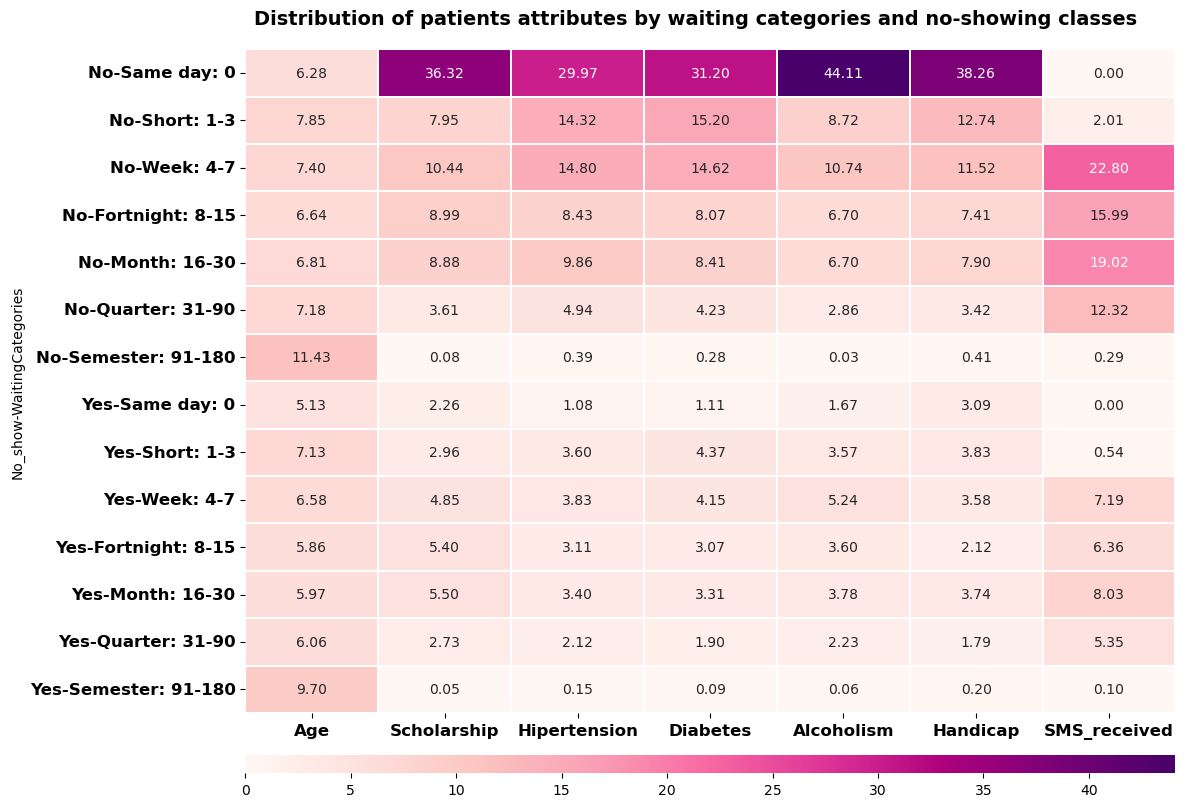

In [74]:
# Drawing a heatmap with the numeric values in each cell
fig4, ax = plt.subplots(figsize=(12, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Distribution of patients attributes by waiting categories and no-showing classes', fontsize=14, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.05, 'aspect':50}
sns.heatmap(patients, annot=True, fmt='.2f', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

### How are the no-shows distributed among the patients?

Patients who miss appointments ("No" categories) are more likely to have received SMS reminders, especially in the "No-Week" (22.8%), "No-Fortnight" (15.99%), and "No-Month" (19.02%) waiting categories, suggesting that reminders alone may not be effective for these groups. Additionally, the highest rates of no-shows are seen in patients with shorter waiting times, particularly on the same day (with high percentages in Scholarship, Hypertension, Diabetes, Alcoholism, and Handicap attributes), indicating that certain vulnerable groups are more prone to missing appointments.

### Is there any common characteristic among patients who miss appointments?


Common characteristics among no-show patients include higher rates of chronic conditions such as hypertension, diabetes, and alcoholism, as well as higher proportions of those with scholarships (likely indicating lower socioeconomic status) and handicaps. This suggests that social and health vulnerabilities are linked to higher no-show rates.

### Are patients suffering from serious illnesses more assiduous?

Patients with serious or chronic illnesses, like diabetes or hypertension, are generally more likely to attend their appointments. They tend to be more careful about not missing visits because regular check-ups are important for managing their health.

# Analysis limitations

### Limited Feature Context and Definitions
Many of the features in the dataset lack clear medical or operational context. For example:

* The `Handcap` column is not clearly defined — it’s unclear what each numeric value signifies. Does a higher number mean greater severity, or different types of disabilities?
* `No_show` does not specify whether it refers to a total absence, late attendance, or a cancellation — each of which would have different implications.
* `SMS_received` does not indicate the content, timing, or number of reminders, which are crucial for interpreting its impact.

This ambiguity may lead to incorrect assumptions or biased interpretations during the analysis.

### Missing Potentially Influential Variables
The dataset does not include many potentially relevant variables that could influence patient behavior, such as:

* Weather conditions on the appointment day
* Distance between a patient’s residence and the clinic
* Mode of transportation
* Appointment type (e.g., routine check-up vs. urgent consultation)
* Patient's employment or family situation
  
Excluding these factors limits our ability to build a comprehensive model for predicting no-shows or drawing firm conclusions.

### Temporal and Regional Specificity
The data is limited to a single city (presumably in Brazil) and a specific time frame (mostly March–June 2016). 

### Handling of Anomalies and Data Cleaning Decisions
During the preprocessing steps:

* Instances with negative waiting days were removed, which is logical but assumes those were clear errors.
* `Age` values below 0 or above 100 were not deeply investigated, though they could be either data entry errors or rare edge cases (e.g., centenarians).
* `AppointmentID` was used as an index, but that assumes each appointment is unique and that there are no duplicates or reused IDs.